In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import json
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
plt.rcParams["figure.figsize"] = 17, 10

In [4]:
b = nx.read_gexf("projections/bipartite.gexf") 
g = nx.read_gexf("projections/onemode.gexf")

### A bit of bipartite exploration

Bgraph key nodes:

* Lope = "1598"
* Lemos = "686"
* Cerv = "759"
* Cuesta = "793"

In [5]:
# Key node bigraph degree
nx.degree(b, nbunch=["793", "759", "686", "1598"])

{'1598': 40, '686': 20, '759': 26, '793': 15}

#### Cervantes

In [6]:
# Cervantes and Cuesta overlap
len(set(b["759"]) & set(b["793"]))

7

In [6]:
cerv_books = set(b["759"])
cerv_cuesta_books = set(b["793"])

In [7]:
cerv_book_data = [b.node[n]['lugar'] for n in cerv_books]
# 8 books in Madrid, Cuesta published 7 of them
cerv_cuesta_book_data = [b.node[n]['fecha'] for n in cerv_cuesta_books]
# 1605 -> 1618 Basically worked together throughout the whole period

In [8]:
# Cervantes and Lemos overlap
len(set(b["759"]) & set(b["686"]))

16

In [10]:
# Lope and lemos overlap
len(set(b["1598"]) & set(b["686"]))

0

In [11]:
# Lope and cuesta overlap
len(set(b["1598"]) & set(b["793"]))

5

In [23]:
# authors = pd.Series([n for (n, a) in g.nodes(data=True) if a.get("role") == "author"])
# patrons = pd.Series([n for (n, a) in g.nodes(data=True) if a.get("role") == "patron"])
# printers = pd.Series([n for (n, a) in g.nodes(data=True) if a.get("role") == "printer/editor"])
# signatories = pd.Series([n for (n, a) in g.nodes(data=True) if a.get("role") == "signatory"])

In [57]:
authors = pd.Series(nx.degree(b, nbunch=[n for (n, a) in b.nodes(data=True) if a.get("role") == "author"]))
author_labels = pd.Series({n: a["label"] for (n, a) in b.nodes(data=True) if a.get("role") == "author"})

In [58]:
auth_df = pd.concat([authors, author_labels], axis=1)
auth_df.columns = ["num_editions", "label"]

### One mode

In [59]:
authors = [n for (n, a) in g.nodes(data=True) if a.get("role") == "author"]
patrons = [n for (n, a) in g.nodes(data=True) if a.get("role") == "patron"]

#### Author/noble edges

In [60]:
import collections
def get_edges(g, bunch1, bunch2):
    edges = collections.defaultdict(list)
    for n in bunch1:
        nbrs = set(g[n])
        for nbr in nbrs:
            if nbr in bunch2:
                edges[n].append(g.edge[n][nbr]["weight"])
    return edges

In [61]:
edge_dict = get_edges(g, authors, patrons)

In [72]:
def aggr_edge_dict(g, edge_dict):
    aggr_dict = {}
    for k, v in edge_dict.items():
        v = list(v)
        length = len(v)
        aggr_dict[k] = [g.node[k]["label"], length, sum(v), sum(v) / length]
    return aggr_dict

In [78]:
auth_noble_aggr_df = pd.DataFrame(aggr_edge_dict(g, edge_dict)).transpose()
auth_noble_aggr_df.columns = ["label", "num_patrons", "total_patron_edge_weight", "avg_patron_edge_weight"]

In [95]:
auth_noble_df = auth_noble_aggr_df.merge(auth_df, on="label")
auth_noble_df = auth_noble_df.sort(columns=["num_editions", "total_patron_edge_weight"], ascending=False)

In [99]:
auth_noble_df

,label,num_patrons,total_patron_edge_weight,avg_patron_edge_weight,num_editions
22,Felix Lope de Vega Carpio,17,5.850794,0.3441643,40
7,Miguel de Cervantes Saavedra,3,4.460714,1.486905,26
13,Jose de Valdivielso,3,2.22619,0.7420635,15
24,Mateo Aleman,4,2.088095,0.5220238,12
15,Alonso de Ledesma,2,1.066667,0.5333333,6
20,Vicente Espinel,2,0.5833333,0.2916667,6
19,Alonso Geronimo de Salas Barbadillo,3,0.7,0.2333333,5
12,Juan Marti,2,0.7095238,0.3547619,4
10,Agustin de Rojas Villaldrando,1,0.2833333,0.2833333,4
21,Bernardo de Balbuena,3,0.9285714,0.3095238,3


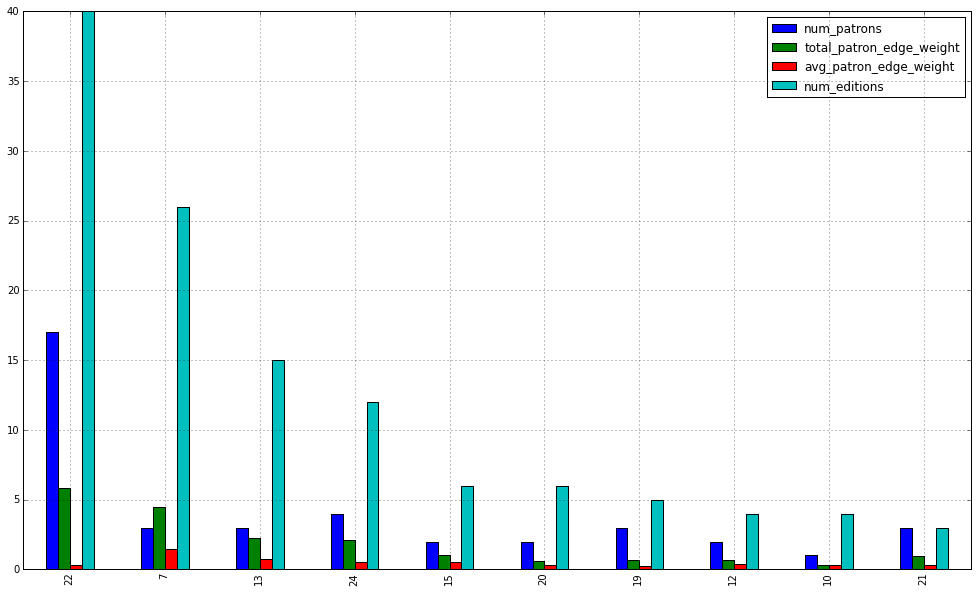

In [100]:
auth_noble_df[:10].plot(kind="bar")